In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#drive.flush_and_unmount(timeout_ms=24)

In [ ]:

import numpy as np
import pandas as pd
import pickle
import numpy as np
import random
import time
import os
#os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = pow(2,40).__str__()
import cv2
from tqdm import tqdm

import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import CSVLogger, LambdaCallback

In [ ]:
# dataset_dir = "drive/My Drive/HAM10000/HAM10000_Gray_Categorized_train_Upsampled/"
dataset_dir = "drive/My Drive/HAM10000/"
work_dir = "drive/My Drive/HAM10000/"

In [ ]:
list_categories = ['akiec','bcc','bkl','df','mel','nv','vasc']
num_classes = len(list_categories)
print('num_classes =', num_classes)

num_classes = 7


In [ ]:
# Saving files:
'''
np.save(work_dir+"np_test_imageset.pkl", np_test_imageset, allow_pickle=True)
np.save(work_dir+"np_val_imageset.pkl", np_val_imageset, allow_pickle=True)
np.save(work_dir+"np_train_imageset.pkl", np_train_imageset, allow_pickle=True)

np.save(work_dir+"np_test_label.pkl", np_test_label, allow_pickle=True)
np.save(work_dir+"np_val_label.pkl", np_val_label, allow_pickle=True)
np.save(work_dir+"np_train_label.pkl", np_train_label, allow_pickle=True)
#'''

'\nnp.save(work_dir+"np_test_imageset.pkl", np_test_imageset, allow_pickle=True)\nnp.save(work_dir+"np_val_imageset.pkl", np_val_imageset, allow_pickle=True)\nnp.save(work_dir+"np_train_imageset.pkl", np_train_imageset, allow_pickle=True)\n\nnp.save(work_dir+"np_test_label.pkl", np_test_label, allow_pickle=True)\nnp.save(work_dir+"np_val_label.pkl", np_val_label, allow_pickle=True)\nnp.save(work_dir+"np_train_label.pkl", np_train_label, allow_pickle=True)\n#'

In [ ]:
# Loading files:
np_test_imageset = np.load(dataset_dir+"HAM10000_Gray_Categorized_train_Upsampled_128x128_norm_test_X.pkl.npy", allow_pickle=True)
np_val_imageset = np.load(dataset_dir+"HAM10000_Gray_Categorized_train_Upsampled_128x128_norm_val_X.pkl.npy", allow_pickle=True)
np_train_imageset = np.load(dataset_dir+"HAM10000_Gray_Categorized_train_Upsampled_128x128_norm_train_X.pkl.npy", allow_pickle=True)

np_test_label = np.load(dataset_dir+"HAM10000_Gray_Categorized_train_Upsampled_128x128_test_Y.pkl.npy", allow_pickle=True)
np_val_label = np.load(dataset_dir+"HAM10000_Gray_Categorized_train_Upsampled_128x128_val_Y.pkl.npy", allow_pickle=True)
np_train_label = np.load(dataset_dir+"HAM10000_Gray_Categorized_train_Upsampled_128x128_train_Y.pkl.npy", allow_pickle=True)

In [ ]:
final_test_imageset = np.expand_dims(np_test_imageset, axis = 3)
final_val_imageset = np.expand_dims(np_val_imageset, axis = 3)
final_train_imageset = np.expand_dims(np_train_imageset, axis = 3)

test_label2 = np.expand_dims(np_test_label, axis = 1)
val_label2 = np.expand_dims(np_val_label, axis = 1)
train_label2 = np.expand_dims(np_train_label, axis = 1)

print('final_test_imageset.shape =', final_test_imageset.shape)
print('final_val_imageset.shape =', final_val_imageset.shape)
print('final_train_imageset.shape =', final_train_imageset.shape)

print('\ntest_label2.shape =', test_label2.shape)
print('val_label2.shape =', val_label2.shape)
print('train_label2.shape =', train_label2.shape)

final_test_imageset.shape = (998, 128, 128, 1)
final_val_imageset.shape = (998, 128, 128, 1)
final_train_imageset.shape = (37555, 128, 128, 1)

test_label2.shape = (998, 1)
val_label2.shape = (998, 1)
train_label2.shape = (37555, 1)


In [ ]:
final_test_label = tf.keras.utils.to_categorical(test_label2, num_classes)
final_val_label = tf.keras.utils.to_categorical(val_label2, num_classes)
final_train_label = tf.keras.utils.to_categorical(train_label2, num_classes)

print('final_test_label.shape =',final_test_label.shape)
print('final_val_label.shape =',final_val_label.shape)
print('final_train_label.shape =',final_train_label.shape)

final_test_label.shape = (998, 7)
final_val_label.shape = (998, 7)
final_train_label.shape = (37555, 7)


In [ ]:
# DenseNet121 ResNet101 DenseNet201 InceptionV3 Xception NASNetLarge ResNet152V2 InceptionResNetV2 EfficientNetB7
impl_type = "TransferLearning.InceptionResNetV2" # TransferLearning3D 
dataset = "HAM10000.gray" # +str(img_size)+"p"

In [ ]:
#'''
count_no_improvement = 0
epoch_initial = True
#'''

In [ ]:
#NUM_NEURONS = 16
#NUM_LAYERS = 3
BATCH_SIZE = 32 # 10
NUM_EPOCHS = 300
epochs_completed = 0
LEARNING_RATE = 0.0001
EPSILON = 1e-4
early_stop_after_epochs = 6
DROPOUT = 0.0 # 0.5 0.0
pad = 0

LOSS = 'categorical_crossentropy'
ACTIVATION_FUNCTION = 'relu' # relu sigmoid
FINAL_ACTIVATION_FUNCTION = 'softmax'
validation_split = 0.1
kernel_size=(1,1)
pointTrainableAfter = "allDefault" # "allDefault" 160
OPTIMIZER = "SGD" # Adam SGD RMSProp
init_weights = None # "imagenet" None
modelExt = ".Dense.128.256.512" # .Dense.128.256.512, .512.512.512

# +"_kernel"+str(kernel_size)+"_lr"+str(LEARNING_RATE)+"_batch"+str(BATCH_SIZE)+"_epochs"+str(NUM_EPOCHS)
#checkpointer_name  = "weights_"+dataset+"_"+impl_type+"_nLayers"+str(NUM_LAYERS)+"_nNeurons"+str(NUM_NEURONS)+".hdf5"
ext = ".Flatten.run_1" # run_1 run_2 .DropAfter .momentum0.9
#'''
checkpointer_name  = "weights."+dataset+".pad"+str(pad)+"."+impl_type+".wInit."+str(init_weights)+".TrainableAfter."+str(pointTrainableAfter)+\
                     modelExt+".actF."+ACTIVATION_FUNCTION+".opt."+OPTIMIZER+".drop."+str(DROPOUT)+".batch"+str(BATCH_SIZE)+ext+".hdf5"
log_name = "log."+checkpointer_name[8:-5]+".log"

print('checkpointer_name =', checkpointer_name)
print('log_name =', log_name)
#'''

checkpointer_name = weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5
log_name = log.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.0.batch32.Flatten.run_1.log


In [ ]:
#'''
#base_model=DenseNet121(weights=None, include_top=False, input_shape=np_train_dataset2.shape[1:]) # `None` (random initialization)
#base_model=ResNet152V2(weights=None, include_top=False, input_shape=np_train_dataset2.shape[1:])
# ResNet152V2 ResNet50 ResNet101 ResNet152 DenseNet201 InceptionV3 Xception NASNetLarge 'imagenet' ResNet152V2 DenseNet121
#inputs = Input(final_train_imageset.shape[1:])
#x = ZeroPadding2D(padding=(pad,pad))(inputs)
#base_model=tf.keras.applications.InceptionResNetV2(weights=init_weights, include_top=False, input_tensor=x)
base_model=tf.keras.applications.InceptionResNetV2(weights=init_weights, include_top=False, input_shape=final_train_imageset.shape[1:])
x=base_model.output

x = Dropout(DROPOUT)(x)
x = Flatten()(x)
#x = Dropout(DROPOUT)(x)

#'''
x = Dropout(DROPOUT)(x)
x = Dense(128)(x)
#x = Dropout(DROPOUT)(x)
x = Dense(256)(x)
#x = Dropout(DROPOUT)(x)
x = Dense(512)(x)
#x = Dropout(DROPOUT)(x)
#'''
outputs=Dense(num_classes,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=outputs)
model.summary()
#'''

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   288         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
count_trainable = 0
count_non_trainable = 0

#'''
if pointTrainableAfter == "allDefault":
    for layer in model.layers:
        layer.trainable=True
        count_trainable += 1
elif pointTrainableAfter > 0:
    for layer in model.layers[:pointTrainableAfter]: # [:-pointTrainableAfter]
        layer.trainable=False
        count_non_trainable += 1
    for layer in model.layers[pointTrainableAfter:]: # [-pointTrainableAfter:]
        layer.trainable=True
        count_trainable += 1
#'''

'''
for layer in model.layers:
    layer.trainable=True
    count_trainable += 1
#'''

print("count_non_trainable =", count_non_trainable)
print("count_trainable =", count_trainable)
print("Total number of layers =", count_non_trainable+count_trainable)

count_non_trainable = 0
count_trainable = 787
Total number of layers = 787


In [ ]:
'''
checkpointer_name  = "weights."+dataset+".pad"+str(pad)+"."+impl_type+".wInit."+str(init_weights)+".TrainableAfter."+str(pointTrainableAfter)+\
                     modelExt+".opt."+OPTIMIZER+".drop."+str(DROPOUT)+".batch"+str(BATCH_SIZE)+ext+".hdf5"
log_name = "log."+checkpointer_name[8:-5]+".log"

print('checkpointer_name =', checkpointer_name)
print('log_name =', log_name)
#'''

'\ncheckpointer_name  = "weights."+dataset+".pad"+str(pad)+"."+impl_type+".wInit."+str(init_weights)+".TrainableAfter."+str(pointTrainableAfter)+                     modelExt+".opt."+OPTIMIZER+".drop."+str(DROPOUT)+".batch"+str(BATCH_SIZE)+ext+".hdf5"\nlog_name = "log."+checkpointer_name[8:-5]+".log"\n\nprint(\'checkpointer_name =\', checkpointer_name)\nprint(\'log_name =\', log_name)\n#'

In [ ]:
# "RMSProp" "SGD" "Adam" "Adamax" "Adadelta" "Adagrad" "SGD"
#optimizer = tf.keras.optimizers.RMSprop(lr = LEARNING_RATE, epsilon=EPSILON)

if OPTIMIZER == "RMSProp":
    optimizer = tf.keras.optimizers.RMSprop(lr = LEARNING_RATE, epsilon=EPSILON)
elif OPTIMIZER == "Adam":
    optimizer = tf.keras.optimizers.Adam(lr = LEARNING_RATE, epsilon=EPSILON, beta_1=0.9, beta_2=0.999)
elif OPTIMIZER == "Adamax":
    optimizer = tf.keras.optimizers.Adamax(lr = LEARNING_RATE, epsilon=EPSILON, beta_1=0.9, beta_2=0.999)
elif OPTIMIZER == "Adadelta":
    optimizer = tf.keras.optimizers.Adadelta(lr = LEARNING_RATE, epsilon=EPSILON, rho=0.95)
elif OPTIMIZER == "Adagrad":
    optimizer = tf.keras.optimizers.Adagrad(lr = LEARNING_RATE, epsilon=EPSILON, initial_accumulator_value=0.1)
elif OPTIMIZER == "SGD":
    optimizer = tf.keras.optimizers.SGD(lr = LEARNING_RATE, momentum=0.9)

model.compile(
    #optimizer=OPTIMIZER,
    optimizer=optimizer,
    loss=LOSS,
    metrics=['accuracy']
)

print("OPTIMIZER =", OPTIMIZER)

OPTIMIZER = SGD


In [ ]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = work_dir+checkpointer_name, 
                               #monitor='val_accuracy',
                               monitor='val_loss',
                               save_weights_only=False,  
                               mode='auto', 
                               verbose = 0, # 0 = silent, 1 = progress bar, 2 = one line per epoch
                               save_best_only =False
                               )
checkpointer_best = ModelCheckpoint(filepath = work_dir+"best_"+checkpointer_name, 
                                    monitor='val_loss', 
                                    save_weights_only=False,
                                    mode='auto',  
                                    verbose = 1, 
                                    save_best_only = True
                                    )
early_stopping = EarlyStopping(monitor='loss', patience=early_stop_after_epochs)

In [ ]:
'''
if 'count_no_improvement' not in globals():
    count_no_improvement = 0
    print("count_no_improvement =", count_no_improvement)
#'''
'''
count_no_improvement = 0
epoch_initial = False
#'''
min_delta = 0.0009
print("count_no_improvement =", count_no_improvement)

def checkBestPerformance(epoch, logs):
    save_filepath = work_dir+"best_"+checkpointer_name

    global epoch_initial
    if epoch_initial == True:
        epoch_initial = False
        model.save(filepath = save_filepath)
        print(". Model saved!")

    elif epoch_initial == False:
        global count_no_improvement

        log_data = pd.read_csv(work_dir+log_name, sep=',', usecols=['val_loss', 'val_accuracy'], engine='python')
        min_val_loss = float(str(min(log_data.val_loss.values))[:6])
        max_val_acc = float(str(max(log_data.val_accuracy.values))[:6])

        current_val_acc = float(str(logs['val_accuracy'])[:6])
        current_val_loss = float(str(logs['val_loss'])[:6])

        if (current_val_loss < min_val_loss) and (abs(current_val_loss-min_val_loss) >= min_delta):
            count_no_improvement = 0
            model.save(filepath = save_filepath)
            print("\nval_loss decreased from",min_val_loss," to",current_val_loss,"( val_accuracy =",current_val_acc,").")

        elif (current_val_loss==min_val_loss) and (current_val_acc>max_val_acc):
            count_no_improvement = 0
            model.save(filepath = save_filepath)
            print("\nval_accuracy increased to", current_val_acc, ".")

        else:
            count_no_improvement += 1
            print(". count_no_improvement =", count_no_improvement)

        if count_no_improvement >= early_stop_after_epochs:
            global list_callbacks
            del list_callbacks, count_no_improvement
            #print("count_no_improvement =", count_no_improvement, "... list_callbacks =", list_callbacks)

count_no_improvement = 0


In [ ]:
epochs_completed = 0
list_callbacks = []
csv_logger = CSVLogger(work_dir+log_name, separator=',', append=True)

#if 'list_callbacks' in globals():
#    del list_callbacks

try:
    log_data = pd.read_csv(work_dir+log_name, sep=',', usecols=['epoch'], engine='python')
    epochs_completed = log_data.shape[0]

    #if epochs_completed > 0:
    model = load_model(work_dir+checkpointer_name)
    list_callbacks = [checkpointer, LambdaCallback(on_epoch_end=checkBestPerformance), csv_logger]
    print("epochs_completed =", epochs_completed)

except Exception as error:
    if epochs_completed == 0:
        # list_callbacks = [checkpointer, checkpointer_best, csv_logger, early_stopping] 
        list_callbacks = [checkpointer, LambdaCallback(on_epoch_end=checkBestPerformance), csv_logger]
        print("epochs_completed =", epochs_completed)
    elif epochs_completed > 0:
        print(error)

print('checkpointer_name =', checkpointer_name)

epochs_completed = 0
checkpointer_name = weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5


In [ ]:
print('checkpointer_name =', checkpointer_name)
print("Previously completed epochs =", epochs_completed)
print("count_no_improvement =", count_no_improvement, "\n")

#'''
try:
    start_time = time.time()
    history = model.fit(final_train_imageset, final_train_label, 
                        shuffle=True, 
                        batch_size = BATCH_SIZE, 
                        epochs = NUM_EPOCHS - epochs_completed, 
                        #steps_per_epoch = 2,
                        #validation_split = validation_split, 
                        validation_data = (final_val_imageset, final_val_label),
                        callbacks=list_callbacks
                        )
    elapsed_time = time.time() - start_time 
    print("\nTime elapsed: ", elapsed_time)

except Exception as error:
    print("\nError:", error)
#'''

checkpointer_name = weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5
Previously completed epochs = 0
count_no_improvement = 0 

Epoch 1/300
1174/1174 [==============================] - 251s 196ms/step - loss: 1.4181 - accuracy: 0.4615 - val_loss: 1.1896 - val_accuracy: 0.5471
. Model saved!
Epoch 2/300
1174/1174 [==============================] - 232s 198ms/step - loss: 0.5320 - accuracy: 0.8302 - val_loss: 0.9986 - val_accuracy: 0.6212

val_loss decreased from 1.1895  to 0.9986 ( val_accuracy = 0.6212 ).
Epoch 3/300
1174/1174 [==============================] - 232s 198ms/step - loss: 0.2726 - accuracy: 0.9208 - val_loss: 0.9411 - val_accuracy: 0.6854

val_loss decreased from 0.9986  to 0.9411 ( val_accuracy = 0.6853 ).
Epoch 4/300
1174/1174 [==============================] - 233s 198ms/step - loss: 0.1570 - accuracy: 0.9594 - val_loss: 0.9514 - val_accuracy: 0.6974

In [ ]:
'''
Record: 
;
---
Test Acc: 0.7315, Test Loss: 1.0199: ep21, weights.HAM10000.gray..pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5
Test Acc: 0.7184, Test Loss: 1.1648: ep11, weights.HAM10000.gray..pad0.TransferLearning.Xception.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5
Test Acc: 0.7134, Test Loss: 1.0581: ep13, weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.6503, Test Loss: 1.2336: ep11, weights.HAM10000.gray.pad0.TransferLearning.InceptionV3.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.6643, Test Loss: 1.1307: ep14, weights.HAM10000.gray.pad0.TransferLearning.DenseNet201.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5
Test Acc: 0.0772, Test Loss: 3.2380: ep4,  weights.HAM10000.gray.pad0.TransferLearning.NASNetLarge.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.6984, Test Loss: 1.4342: ep13, weights.HAM10000.gray.pad0.TransferLearning.ResNet152V2.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.0471, Test Loss: 2.0939: ep8,  weights.HAM10000.gray.pad0.TransferLearning.EfficientNetB7.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.7014, Test Loss: 1.9539: ep7,  weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.opt.Adam.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.6924, Test Loss: 3.5646: ep7,  weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.opt.RMSProp.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.7104, Test Loss: 0.9851: ep11, weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.5.batch32.Flatten.run_3.hdf5
Test Acc: 0.7074, Test Loss: 0.9644: ep11, weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.8.batch32.Flatten.run_1.hdf5
Test Acc: 0.7234, Test Loss: 1.0095: ep12, weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.actF.sigmoid.opt.SGD.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.7164, Test Loss: 1.1061: ep12, weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.5.batch32.Flatten.run_2.hdf5
Test Acc: 0.7074, Test Loss: 1.1724: ep9,  weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5

#'''

csv_logger = CSVLogger(work_dir+log_name, separator=',', append=True)
log_data = pd.read_csv(work_dir+log_name, sep=',', usecols=['epoch'], engine='python')
epochs_completed = log_data.shape[0]

result = model.evaluate(final_test_imageset, final_test_label)
print("Test Acc: {}, Test Loss: {}: ep{}, {}\n".format(round(result[1],4), round(result[0],4), epochs_completed, checkpointer_name))


32/32 [==============================] - 2s 59ms/step - loss: 1.1724 - accuracy: 0.7074
Test Acc: 0.7074, Test Loss: 1.1724: ep9, weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5



In [ ]:
#checkpointer_name = "weights.Fashion.DenseNet121.wInit.None.TrainableAfterallDefault.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5"
model_loaded = load_model(work_dir+"best_"+checkpointer_name)
print("Loaded "+work_dir+"best_"+checkpointer_name+".")

Loaded drive/My Drive/HAM10000/best_weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5.


In [ ]:
'''
Record: 
;
---
Test Acc: 0.7064, Test Loss: 0.8730: ep21, best_weights.HAM10000.gray..pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5
Test Acc: 0.7164, Test Loss: 0.9565: ep11, best_weights.HAM10000.gray..pad0.TransferLearning.Xception.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5
Test Acc: 0.7355, Test Loss: 0.8350: ep13, best_weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.5922, Test Loss: 1.1356: ep11, best_weights.HAM10000.gray.pad0.TransferLearning.InceptionV3.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.6914, Test Loss: 0.9901: ep14, best_weights.HAM10000.gray.pad0.TransferLearning.DenseNet201.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5
Test Acc: 0.0110, Test Loss: 2.1527: ep4,  best_weights.HAM10000.gray.pad0.TransferLearning.NASNetLarge.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.6403, Test Loss: 1.1542: ep13, best_weights.HAM10000.gray.pad0.TransferLearning.ResNet152V2.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.0411, Test Loss: 1.9381: ep8,  best_weights.HAM10000.gray.pad0.TransferLearning.EfficientNetB7.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.6693, Test Loss: 1.0709: ep7,  best_weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.opt.Adam.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.6733, Test Loss: 1.1676: ep7,  best_weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.opt.RMSProp.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.6954, Test Loss: 0.9408: ep11, best_weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.opt.SGD.drop.0.5.batch32.Flatten.run_3.hdf5
Test Acc: 0.6964, Test Loss: 0.8746: ep12, best_weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.actF.sigmoid.opt.SGD.drop.0.5.batch32.Flatten.run_1.hdf5
Test Acc: 0.6854, Test Loss: 0.9280: ep12, best_weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.5.batch32.Flatten.run_2.hdf5
Test Acc: 0.6683, Test Loss: 1.0164: ep9,  best_weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5

#'''
'''
csv_logger = CSVLogger(work_dir+log_name, separator=',', append=True)
log_data = pd.read_csv(work_dir+log_name, sep=',', usecols=['epoch'], engine='python')
epochs_completed = log_data.shape[0]
#'''

result2 = model_loaded.evaluate(final_test_imageset, final_test_label)
#print("nLayers: {}, nNeurons: {}, DROPOUT: {}, Test Acc: {}, Test Loss: {}".format(NUM_LAYERS, NUM_NEURONS, DROPOUT, round(result2[1], 4), round(result2[0], 4)))
print("Test Acc: {}, Test Loss: {}: ep{}, {}\n".format(round(result2[1],4), round(result2[0],4), epochs_completed, "best_"+checkpointer_name))


32/32 [==============================] - 5s 58ms/step - loss: 1.0164 - accuracy: 0.6683
Test Acc: 0.6683, Test Loss: 1.0164: ep9, best_weights.HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5



In [ ]:
import csv

with open(work_dir+'Records.csv', "a") as fp:
    wr = csv.writer(fp, dialect='excel')
    try:
        wr.writerow([checkpointer_name[8:-5], round(result2[1], 4), round(result2[0], 4), elapsed_time])
    except:
        wr.writerow([checkpointer_name[8:-5], round(result2[1], 4), round(result2[0], 4)])
print("Saved results.")

Saved results.


In [ ]:
#Confution Matrix and Classification Report
'''
Y_pred = model_loaded.predict_generator(final_test_imageset, len(final_test_imageset))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
#'''

"\nY_pred = model_loaded.predict_generator(final_test_imageset, len(final_test_imageset))\ny_pred = np.argmax(Y_pred, axis=1)\nprint('Confusion Matrix')\nprint(confusion_matrix(y_test, y_pred))\n#"

In [ ]:
# Precision [TP/TP+FP] = The ratio of correctly predicted positive observations to the total predicted positive observations.
# Recall (Sensitivity) [TP/TP+FN] = The ratio of correctly predicted positive observations to the all observations in actual class - 'yes'.
# F1 score [F1 Score = 2*(Recall * Precision) / (Recall + Precision)] = The weighted average of Precision and Recall.
# Support = The number of samples of the true response that lie in that class.
'''
print('Classification Report:')
#target_names = ['Mono', 'Di'] # not ['Di', 'Mono']
print(classification_report(y_test, y_pred)) #, target_names=target_names))
#'''

"\nprint('Classification Report:')\n#target_names = ['Mono', 'Di'] # not ['Di', 'Mono']\nprint(classification_report(y_test, y_pred)) #, target_names=target_names))\n#"

In [ ]:
'''
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=list_categories))
#'''

"\nprint('Classification Report')\nprint(classification_report(y_test, y_pred, target_names=list_categories))\n#"

In [ ]:
log_data = pd.read_csv(work_dir+log_name, sep=',', engine='python') 

In [ ]:
# Getting the model history keys 
#history.history.keys()
log_data.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.600879,1.102682,0.547094,1.189587
1,1,0.855385,0.458539,0.621242,0.998613
2,2,0.930316,0.242406,0.685371,0.941119
3,3,0.962881,0.140929,0.697395,0.951374
4,4,0.979177,0.085627,0.679359,1.079674


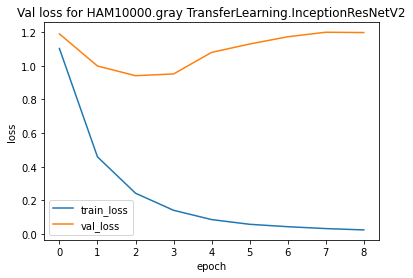

img_path = drive/My Drive/HAM10000/Images/vLoss_HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.0.batch32.Flatten.run_1.png


In [ ]:
# plot the training artifacts
title = "Val loss for "+dataset+" "+impl_type

plt.plot(log_data['loss'])
plt.plot(log_data['val_loss'])
plt.title(title)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'best')

img_path = work_dir+'Images/vLoss_'+checkpointer_name[8:-5]+'.png'
plt.savefig(img_path, dpi=600)
plt.show()
print('img_path =', img_path)

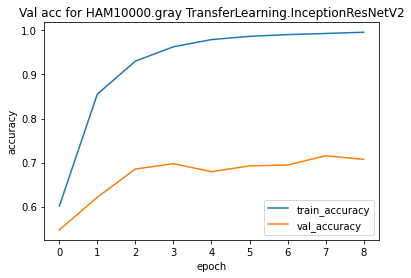

img_path = drive/My Drive/HAM10000/Images/vAcc_HAM10000.gray.pad0.TransferLearning.InceptionResNetV2.wInit.None.TrainableAfter.allDefault.Dense.128.256.512.actF.relu.opt.SGD.drop.0.0.batch32.Flatten.run_1.png


In [ ]:
title = "Val acc for "+dataset+" "+impl_type

plt.plot(log_data['accuracy'])
plt.plot(log_data['val_accuracy'])
plt.title(title)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'], loc = 'best')

img_path = work_dir+'Images/vAcc_'+checkpointer_name[8:-5]+'.png'
plt.savefig(img_path, dpi=600)
plt.show()
print('img_path =', img_path)